##### Problem Set 3

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

### 1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


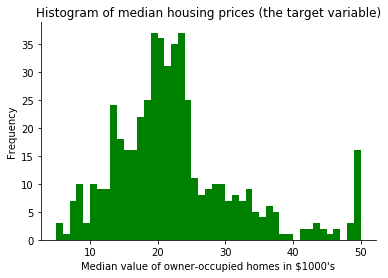

In [4]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
ax = plt.subplot(111)
ax.hist(bdata.target, bins = np.arange(5, 50 + 1, 1), color = "green")
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Frequency")
plt.title("Histogram of median housing prices (the target variable)")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Text(0.5, 0, 'Per-capita crime rate')

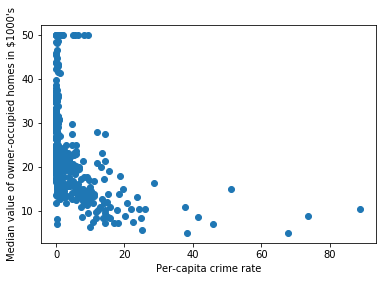

In [5]:
# enter your code below
plt.scatter(bdata.data[:,0], bdata.target)
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.xlabel("Per-capita crime rate")

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

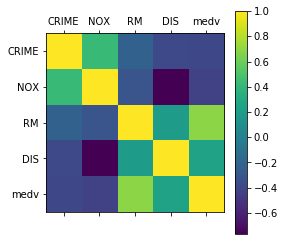

In [6]:
# enter your code here

# ones = np.sum(bdata.data[:,3])
# zeros = len(bdata.data[:,3]) - ones
# plt.bar(["0","1"], [zeros, ones])
df_corr = pd.DataFrame({"CRIME":bdata.data[:,0],"NOX":bdata.data[:,4], "RM":bdata.data[:,5],"DIS":bdata.data[:,7], "medv":bdata.target}) 
plt.matshow(df_corr.corr())
plt.xticks(range(len(df_corr.columns)), df_corr.columns)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
plt.colorbar()
plt.show()

From the above correlation plot we see that CRIME is less related to the median value of the house prices in Boston, whereas the distance to the employment centres is most related to the median

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [7]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    rmse = np.sqrt(((predictions - yvalues) ** 2).mean())
    return rmse

# print (compute_rmse(np.asarray([2,2,3]),np.asarray([0,2,6])))

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [8]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
from sklearn.model_selection import train_test_split

np.random.seed(seed=13579)

# enter your code here
# bdata_train, bdata_test, target_train, target_test = train_test_split(bdata.data, bdata.target, test_size=0.34)

shuffle_idx = np.arange(0,len(bdata.data),1)
np.random.shuffle(shuffle_idx)
bdata_train = bdata.data[shuffle_idx[:int(0.66*len(bdata.data))]]
target_train = bdata.target[shuffle_idx[:int(0.66*len(bdata.data))]]
bdata_test = bdata.data[shuffle_idx[int(0.66*len(bdata.data)):]]
target_test = bdata.target[shuffle_idx[int(0.66*len(bdata.data)):]]

### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [9]:
# enter your code here
def base_model(X, y, target_train):
    base_prediction = np.mean(target_train)
    predictions = [base_prediction for i in range(X.shape[0])]
#     predictions = ndarray((bdata_train.shape[0],),float)
    rmse = compute_rmse(np.asarray(predictions), y)
    return rmse

base_model_train_rmse = base_model(bdata_train, target_train, target_train)
base_model_test_rmse = base_model(bdata_test, target_test, target_train)

print ("Base Model RMSE on training set is ", round(base_model_train_rmse, 4))
print ("Base Model RMSE on test set is ", round(base_model_test_rmse, 4))

Base Model RMSE on training set is  8.585
Base Model RMSE on test set is  10.2817


*Enter your observations here*

Base Model RMSE on training set is  8.585

Base Model RMSE on test set is  10.2817

Yes, what we observe is as expected. We see that the RMSE on the test is higher than the train data RMSE. This could be attributed to the reason that the distribution for the train and test maybe different and we simple consider the predicted value as the mean of the median values for all instances in the train data and model accordingly. 

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [10]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    if L == 2:
        # dist = np.linalg.norm(np.asarray(x1)-np.asarray(x2))
        dist = np.sqrt(np.sum((np.asarray(x1)-np.asarray(x2))**2))
    elif L == 1:
        dist = np.linalg.norm(np.asarray(x1)-np.asarray(x2), ord=1)
    return int(dist)

# print (distance((3,4),(6,8),2))

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [21]:
"""
# write your function specification here!
"""
import time
def nneighbor(bdata_train, target_train, bdata_test, target_test, features, L):
    start_time = time.time()
    test_pred = []
    #your code here
    for test_idx in range(len(bdata_test)):
        test_features = bdata_test[test_idx][features]
        min_dist = np.inf
        for train_idx in range(len(bdata_train)):
            train_features = bdata_train[train_idx][features]
            dist = distance(test_features,train_features,L)
            if dist < min_dist:
                target_ = target_train[train_idx]
                min_dist = dist
        test_pred.append(target_)
    test_pred = np.array(test_pred)
    rmse = compute_rmse(test_pred,target_test)
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

#your additional code here
feature_list = [0,5]
print(nneighbor(bdata_train, target_train, bdata_test, target_test, feature_list, 2))

Time taken: 0.57 seconds
8.529459320530114


Time taken to predict the nearest neighbors for all the values in the test data set is 0.53 seconds. The RMSE value is 8.53.

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [22]:
"""
# write your function specification here!
"""
def normalize(raw_data):
    normalized_data = (raw_data - np.mean(raw_data,axis=0)) / np.std(raw_data,axis=0)
    return normalized_data

#your additional code here

bdata_train_normalized = normalize(bdata_train)
target_train_normalized = normalize(target_train)
bdata_test_normalized = normalize(bdata_test)
target_test_normalized = normalize(target_test)

print(nneighbor(bdata_train_normalized,target_train_normalized,bdata_test_normalized,target_test_normalized, feature_list, 2))

Time taken: 0.57 seconds
0.8142267854185721


*Observations:*

Without normalization, the RMSE was 8.53 while after normalization the RMSE reduces drastically to 0.81. Hence, this asserts that it is important to normalize our features in the Nearest Neighbor algorithms.

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

Time taken: 0.5 seconds
Time taken: 0.68 seconds


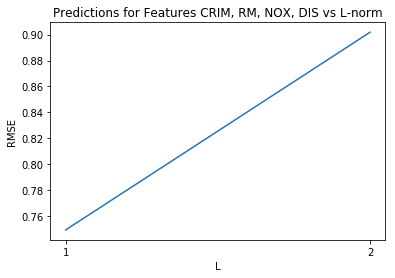

In [23]:
# enter your code here
# add new features
# features = CRIM, RM, NOX, DIS | index : 0,4,5,7
# we will iterate this over different values of L

rmse_ = np.zeros(2)
L = [1,2]
for l in (L):
    rmse_[l-1] = nneighbor(bdata_train_normalized, target_train_normalized, bdata_test_normalized, target_test_normalized,[0,4,5,7], l)

plt.plot(rmse_)
plt.xticks(np.arange(0,2,1), np.arange(1,3,1))
plt.xlabel("L")
plt.ylabel("RMSE")
plt.title("Predictions for Features CRIM, RM, NOX, DIS vs L-norm")
plt.show()

For the combination of features CRIM RM NOX DIS, we get a lower RMSE for L1 norm compared to L2 distance norm.

Time taken: 0.5 seconds
Time taken: 0.58 seconds


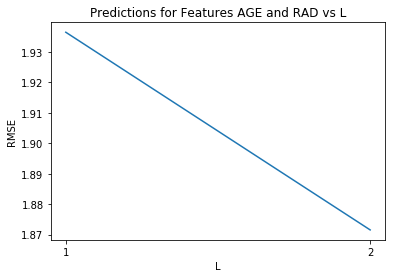

In [24]:
# Try a model that uses a different set of 2 features
# Trying combination of AGE and RAD
# Features = AGE, RAD | index = 6, 8
rmse_ = np.zeros(2)
L = [1,2]
for l in (L):
    rmse_[l-1] = nneighbor(bdata_train_normalized, target_train_normalized, bdata_test_normalized, target_test_normalized,[6,8], l)
    
plt.plot(rmse_)
plt.xticks(np.arange(0,2,1), np.arange(1,3,1))
plt.xlabel("L")
plt.ylabel("RMSE")
plt.title("Predictions for Features AGE and RAD vs L")
plt.show()

For the combination of two features AGE and RAD, we get a lower RMSE for L2 norm compared to L1 distance norm.

Time taken: 0.53 seconds
Time taken: 0.79 seconds


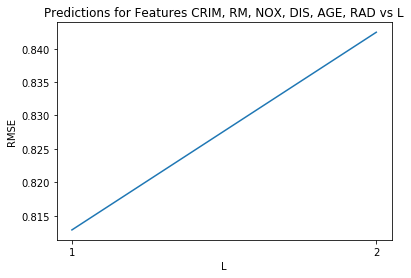

In [25]:
#try at least one model that uses more than 4 features
#In Fig1 we tried a combination of 4 features : CRIM, RM, NOX, DIS and the RMSE is ~0.77
#In Fig2 we tried a combination of AGE and RAD and saw the RMSE is ~1.4
# Let's try adding all these features and see if the results improve over different values of L
rmse_ = np.zeros(2)
L = [1,2]
for l in (L):
    rmse_[l-1] = nneighbor(bdata_train_normalized, target_train_normalized, bdata_test_normalized, target_test_normalized,[0,4,5,7,6,8], l)
    
plt.plot(rmse_)
plt.xticks(np.arange(0,2,1), np.arange(1,3,1))
plt.xlabel("L")
plt.ylabel("RMSE")
plt.title("Predictions for Features CRIM, RM, NOX, DIS, AGE, RAD vs L")
plt.show()

We again see that, when all the six features are combined, L1 norm gives a better RMSE.

The decision on number of features does no affect the running time significantly. However, in general, the time taken for L2 norm is more than the time taken by L1 norm. From the combinations tried, for the combination of 4 features CRIM RM NOX DIS, we get the lowest RMSE for L1 norm.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [26]:
# Split a dataset into k folds
np.random.seed(seed=13579)
#data sets are shuffled before, thus taking 10 sets from those
sets = np.arange(0,333,33)
k_folds = 10
kfold_rmse = []
start_time = time.time()
for i in range(k_folds):
    train_idx = np.arange(sets[i], sets[i+1])
    all_idx = np.arange(0,333,1)
    test_idx = np.delete(all_idx, train_idx)
    data_train_kf =  bdata_train_normalized[train_idx,:]
    target_train_kf = target_train_normalized[train_idx]
    data_test_kf = bdata_train_normalized[test_idx,:]
    target_test_kf = target_train_normalized[test_idx]
    kfold_rmse.append(nneighbor(data_train_kf, target_train_kf, data_test_kf, target_test_kf, feature_list, 2))
time_taken = round(time.time() - start_time, 2)
print ("\nThe average RMSE across the 10 iterations is ",np.mean(np.asarray(kfold_rmse)))
print ("Total running time for all the 10 folds is "+str(time_taken)+" seconds")

Time taken: 0.15 seconds
Time taken: 0.09 seconds
Time taken: 0.1 seconds
Time taken: 0.11 seconds
Time taken: 0.11 seconds
Time taken: 0.1 seconds
Time taken: 0.11 seconds
Time taken: 0.09 seconds
Time taken: 0.1 seconds
Time taken: 0.26 seconds

The average RMSE across the 10 iterations is  0.7851960594319336
Total running time for all the 10 folds is 1.24 seconds


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [27]:
"""
# write your function specification here!
"""
def knn(bdata_train, bdata_test, target_train, target_test, L, k, features_list = list(np.arange(0,13,1))):
    # enter your code here
    #start_time = time.time()
    predictions = np.zeros(len(bdata_test))
    for i in range(len(bdata_test)):
        distances = np.apply_along_axis(lambda x: distance(x, bdata_test[i,features_list], L), 1, bdata_train[:,features_list])
        predictions[i] = np.mean(target_train[np.argsort(distances)[:k]])
    rmse = compute_rmse(target_test, predictions)    
    return rmse

#your additional code here
knn(bdata_train_normalized, bdata_test_normalized, \
                target_train_normalized, target_test_normalized,2,3)

def knn_kfold(k_neighbors, features_list = list(np.arange(0,13,1)) ): #note here k is the no. of neighbrs
    start_time = time.time()
    sets = np.arange(0,333,33)
    kfold_rmse = []
    for i in range(10):
        train_idx = np.arange(sets[i], sets[i+1])
        all_idx = np.arange(0,333,1)
        test_idx = np.delete(all_idx, train_idx)
        data_train_kf =  bdata_train_normalized[train_idx,:]
        target_train_kf = target_train_normalized[train_idx]
        data_test_kf = bdata_train_normalized[test_idx,:]
        target_test_kf = target_train_normalized[test_idx]
    
        kfold_rmse.append(knn(data_train_kf, data_test_kf, target_train_kf, target_test_kf,2,k_neighbors, features_list))
        
    kf_rmse = np.mean(np.asarray(kfold_rmse)) 
    print( "Time taken: " + str(round(time.time() - start_time,2)) + " seconds,", "rmse", kf_rmse)
    return kf_rmse

knn_kfold(3)

Time taken: 2.09 seconds, rmse 0.70815793579273


0.70815793579273

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Time taken: 2.3 seconds, rmse 0.7912100101698779
Time taken: 1.97 seconds, rmse 0.7273981865115834
Time taken: 1.94 seconds, rmse 0.7087203394219347
Time taken: 2.09 seconds, rmse 0.701703348296666
Time taken: 2.01 seconds, rmse 0.7148479383884433
Time taken: 1.91 seconds, rmse 0.7235404633219382
Time taken: 1.99 seconds, rmse 0.737674179641909
Time taken: 1.95 seconds, rmse 0.7494210339775986
Time taken: 1.81 seconds, rmse 0.7622517486017817
Time taken: 1.98 seconds, rmse 0.7753768316186209
Time taken: 1.84 seconds, rmse 0.7845067174456922
Time taken: 1.86 seconds, rmse 0.794302294141396
Time taken: 2.08 seconds, rmse 0.8057267921006014
Time taken: 1.76 seconds, rmse 0.8162970012992588
Time taken: 2.2 seconds, rmse 0.8266411123055212
Time taken: 1.88 seconds, rmse 0.837427326178573
Time taken: 1.86 seconds, rmse 0.8479835437597506
Time taken: 1.91 seconds, rmse 0.8575657598138692
Time taken: 1.94 seconds, rmse 0.8675795882495437
Time taken: 2.1 seconds, rmse 0.8763424405563194
Time ta

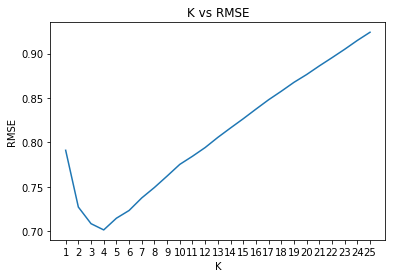

In [28]:
# enter your code here
# using normalized data
k_ = np.arange(1,26,1)
k_rmse = np.zeros(25)
for i in range(len(k_)):
    k_rmse[i] = knn_kfold(k_[i], [0,1,5,6,7,9])

plt.plot(k_rmse)
plt.xlabel("K")
plt.xticks(np.arange(0,25,1), np.arange(1,26,1))
plt.ylabel("RMSE")
plt.title("K vs RMSE")
plt.show()

*Enter your observations here*

We see that there is a dip in the RMSE at k=4 and after that the RMSE increases continuously. From the graph, we can see the best choice of k is 4. The best value of k=3 when the distance function returns in float, and k=4 when the distance function returns in integer type. 